In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [38]:
# importing microglia morphology data
microglia_df = pd.read_csv("C:/Users/marin/OneDrive/Documentos/Prog/dados_microglia.csv", decimal=',')
# removing analysis index  column  
del microglia_df['Índice de Analise']
# modifying columns names
microglia_df.columns = ['Group','Animal','Segments','End-points','Lengh','N Cells','Density','Span Ratio','Circularity','Area']
microglia_df.head()


,Group,Animal,Segments,End-points,Lengh,N Cells,Density,Span Ratio,Circularity,Area
0,Jovem,1.1,218.81,346.70,168126.63,27,0.065,1.062,0.864,53184
1,Jovem,1.1,291.00,440.71,224866.81,21,0.088,1.266,0.883,31161
2,Jovem,1.1,288.58,483.17,262402.17,12,0.051,1.883,0.620,25441
3,Jovem,1.1,230.93,386.40,201715.20,15,0.070,1.502,0.811,36636
4,Jovem,1.1,140.23,230.77,112471.45,22,0.066,1.571,0.807,29492


In [59]:
# separating skeleton and fraclac parameters 
skeleton_df = microglia_df[['Group','Segments','End-points','Lengh']]
fraclac_df = microglia_df[['Group','Density','Span Ratio','Circularity','Area']]
print(fraclac_df.head(2),2*'\n', skeleton_df.head(2))


   Group  Density  Span Ratio  Circularity   Area
0  Jovem    0.065       1.062        0.864  53184
1  Jovem    0.088       1.266        0.883  31161 

    Group  Segments  End-points      Lengh
0  Jovem    218.81      346.70  168126.63
1  Jovem    291.00      440.71  224866.81


<AxesSubplot:xlabel='Group', ylabel='N Cells'>

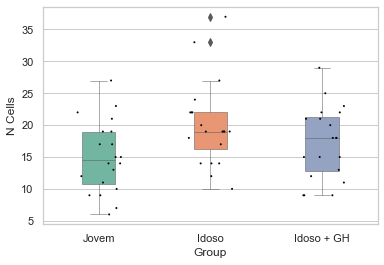

In [57]:
# plot1 -> n cells x groups
sns.set_theme(style = 'whitegrid')
sns.boxplot(x=microglia_df['Group'],y=microglia_df['N Cells'],palette='Set2', width=0.3,linewidth=0.5)
sns.stripplot(x=microglia_df['Group'], y=microglia_df['N Cells'],color='black', jitter=0.2, size=2)

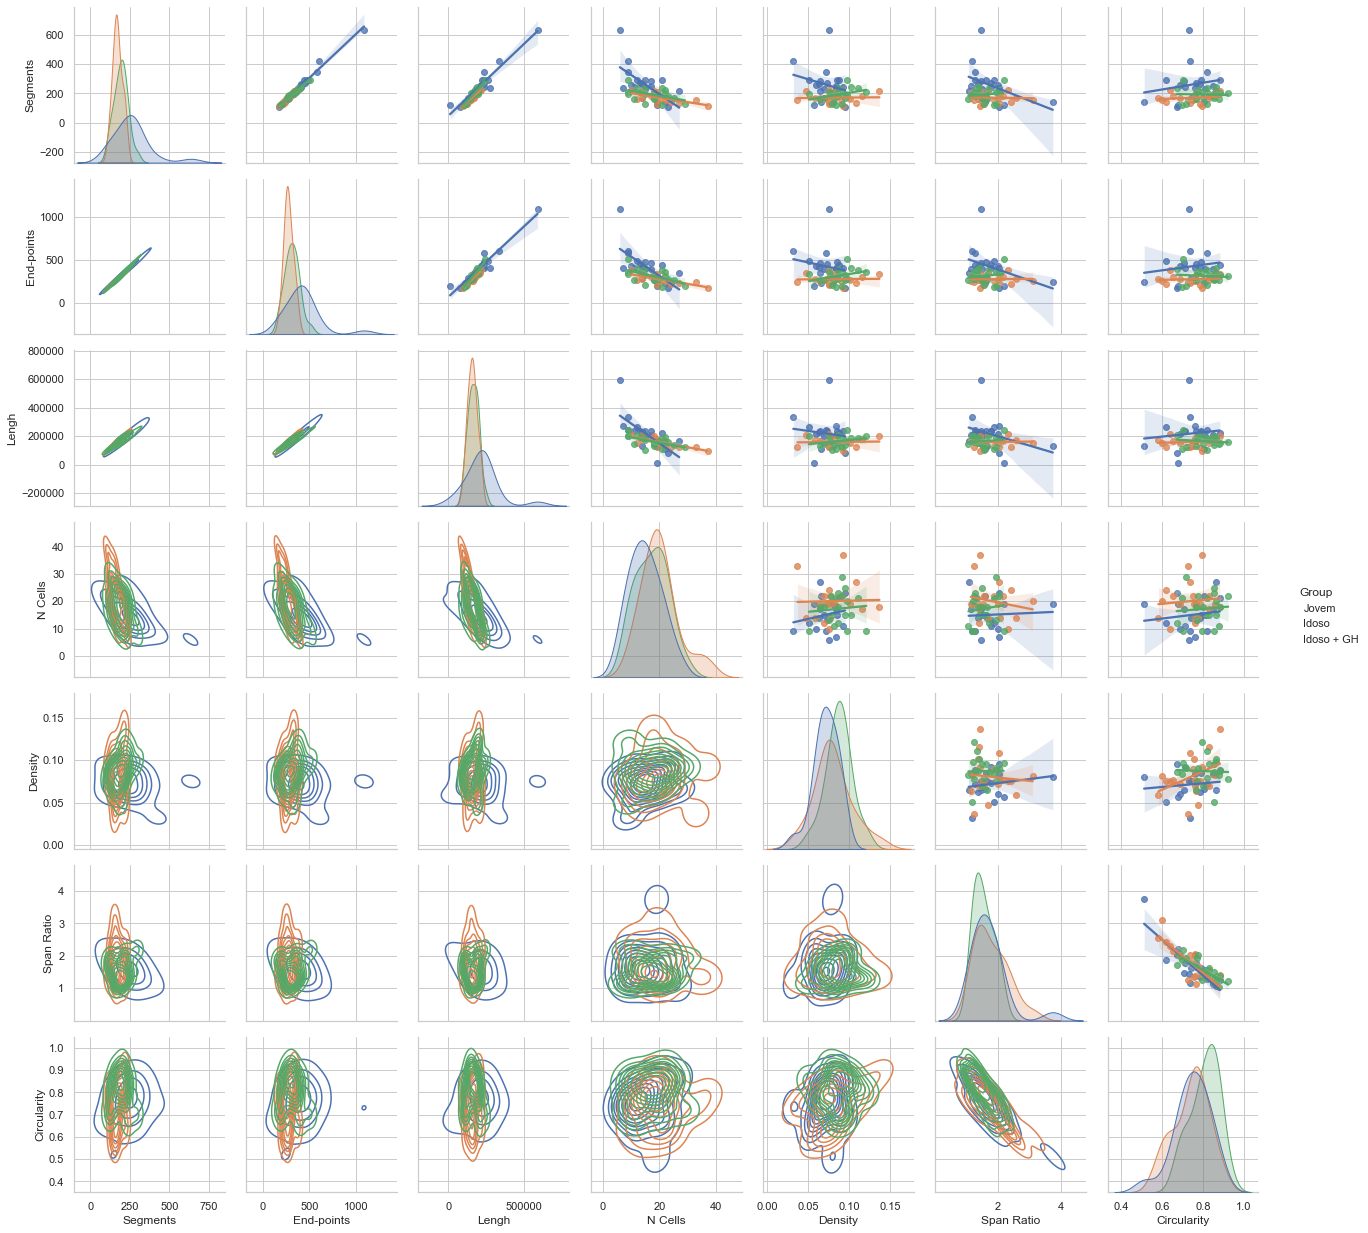

In [62]:
# Plot n -> paramters x parameters 
g=sns.PairGrid(microglia_df,diag_sharey= False, hue='Group').add_legend()
g.map_lower(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot,lw=1,fill=True)

<AxesSubplot:>

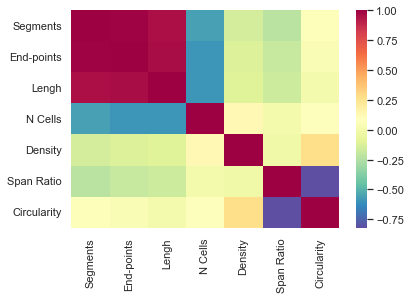

In [63]:
# creating correlation df and ploting it 
corr_df = microglia_df.drop(['Group','Animal',], axis=1).corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='Spectral_r')